#Introducción a Keras

Antes de meternos de lleno con el problema a resolver pienso que sería interesante añadir un ejemplo introductorio a la librería Keras. En vista de que este TFG no es sólo de resolver un problema sino un acercamiento práctico al Deep Learning y de que varias de las prácticas que haremos ahora se realizarán a la hora de resolver el problema, veo necesario (tanto para este trabajo como para mi)  este apartado.

Por lo tanto en este apéndice veremos como:


1.   Importar un conjunto de datos de Keras, en concreto MNIST.
2.   Procesado del dataset para poder usarlo en nuestro modelo.
3.   Generar y entrenar un modelo
4.   Realizar clasificaciones.





[Guía seguida](https://nextjournal.com/gkoehler/digit-recognition-with-keras)

##Preprocesado del conjunto de datos

In [0]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt
#Para la distribución
from collections import Counter
import seaborn as sns 


#Instanciamos el dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Como sabemos MNIST está formada por imágenes de 28x28 en escala de grises. Veamos a continuación el formato de las imágenes del Dataset que nos propone Keras.


Número de imágenes de train:  60000
Número de imágenes de test:  10000
Formato de imagen individual:  (28, 28)
Formato del conjunto entero:  (60000, 28, 28) Es decir, 60000 imágenes de 28x28 p 

Figura de ejemplo:


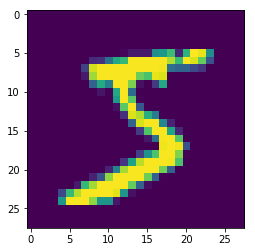

Accedemos a su posición en el vector de etiquetas: 5 

Distribución de clases de entrenamiento:


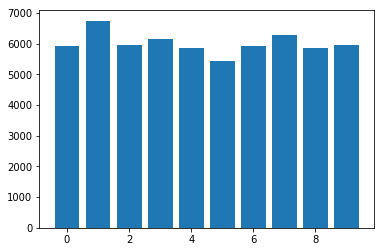

In [0]:
print("Número de imágenes de train: ", len(X_train))
print("Número de imágenes de test: ", len(X_test))
print("Formato de imagen individual: ", X_train[0].shape)
print("Formato del conjunto entero: ", X_train.shape, "Es decir, 60000 imágenes de 28x28 p \n")

#Mostramos una imagen de entrenamiento de ejemplo
print("Figura de ejemplo:")
plt.imshow(X_train[0])
plt.show()

print("Accedemos a su posición en el vector de etiquetas:", y_train[0], "\n")

#Mostramos la distribución
print("Distribución de clases de entrenamiento:")
distr = Counter(y_train)
plt.bar(distr.keys(), distr.values())
plt.show()

Si nos fijamos en la tabla de **distribución** vemos que más o menos hay un mismo número de ejemplos para cada una de las clases. Es importante tener un conjunto de datos equilibrado para que nuestra red neuronal trabaje correctamente.

Ahora realizaremos una **normalización** entre 0 y 1 de nuestros datos de entrenamiento. Citando un post de StackOverflow [[1]](https://stackoverflow.com/questions/51593082/need-of-normalizing-data/51601642):


> `Normalization has nothing to do with the training speed, normalized data permit to the model to learn the importance and the correlation between the features. The most of the time a "non-normalized" data don't permit a correct approximation of the input, resulting in strange results.`


También es importante formatear las etiquetas del conjunto de entrenamiento (digitos de 0 a 9) usado **one-hot encoding**. El resultado será que una etiqueta (o clasificación para un ejemplo) en vez de ser un número será un vector de diez digitos con todos ceros excepto un uno donde corresponda la clasificación. Para esto hacemos uso de np.utils de Keras

También es importante tener en cuenta que **los datos de entrada de la red convolucional deben de estar bien formateados** . En nuestro caso las redes de keras tienen dos formatos:


1.   first_channel: el primer valor es el número de canales que tiene la imagen (channels, rows, colums) -> (1, 28, 28)
2.   last_channel: (28, 28, 1)

En el apartado anterior vimos que las imagenes del dataset tienen formato (28, 28) por lo tanto tendremos que añadirle a la tupla otro elemento que diga el número de canales que tiene nuestra imagen.










In [0]:
#Formateamos las imágenes
print("Formato anterior de las imágenes:", X_train.shape)
X_train = X_train.reshape(60000, 28, 28, 1)
print("Nuevo formato para las imágenes:", X_train.shape)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train = X_train.astype('float32') #Esto lo hacemos para poder aplicar en el siguiente paso /=
X_test = X_test.astype('float32')


#Normalización de los datos
X_train /= 255
X_test /= 255

#One-hot encoding
n_clases = 10
Y_train = np_utils.to_categorical(y_train, n_clases)
Y_test = np_utils.to_categorical(y_test, n_clases)

print("\nPara la imagen anteriormente mostrada (dígito 5) la clasificación sería:")
print("Clasificación que viene de serie:", y_train[0])
print("Clasificación con formato en one-hot:", Y_train[0])

Formato anterior de las imágenes: (60000, 28, 28)
Nuevo formato para las imágenes: (60000, 28, 28, 1)

Para la imagen anteriormente mostrada (dígito 5) la clasificación sería:
Clasificación que viene de serie: 5
Clasificación con formato en one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


##Generando la red neuronal

Para generar la red neuronal usaremos diversas clases para cada una de las capas. Usaremos un modelo de tipo **Sequential**, este nos permitirá hacer un modelo capa a capa. Usaremos **add()** para añadir capas a nuestro modelo. Viendo como funciona una red convolucional usaremos estos tipos de capas:


*   Convolucional -> Conv2D(nº filtros, tamaño kernel, funcion de activacion, margen, stride, formato de entrada)
*   Pooling -> MaxPooling2D(tamaño del kernel)

*   Capa plana -> Flatten()
*   Capa conectada hacia delante para clasificacion -> Dense(n1 de caslses, función activación)




Para este ejemplo haremos uso de la red **VGG13** la cual sigue la sigueinte estructura: 

![texto alternativo](https://cdn-images-1.medium.com/max/800/1*zOjMs185kZmqh2jK5kRp_Q.png)


Nota; cada convolución tiene un kernel de 3x3 con stride 1 (número de casillas que se desplaza), padding = same y las capas de pooling usan un kernel de 2x2, stride=2 y padding=same

In [0]:
#Importaciones
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

modelo = Sequential()
#Debemos meter el formato de entrada solo en la primera capa
modelo.add(Conv2D(64, kernel_size=(3,3), padding='same', strides=(1,1), activation ='relu', input_shape=(28,28,1)))
modelo.add(Conv2D(64, kernel_size=(3,3), padding='same', strides=(1,1), activation ='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2), padding="same", strides=(2,2)))

modelo.add(Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1), activation ='relu'))
modelo.add(Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1), activation ='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2), padding="same", strides=(2,2)))

modelo.add(Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1), activation ='relu'))
modelo.add(Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1), activation ='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2), padding="same", strides=(2,2)))

modelo.add(Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1), activation ='relu'))
modelo.add(Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1), activation ='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2), padding="same", strides=(2,2)))

modelo.add(Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1), activation ='relu'))
modelo.add(Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1), activation ='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2), padding="same", strides=(2,2)))

modelo.add(Flatten())
modelo.add(Dense(4096, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(4096, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(10, activation='softmax'))


#Ahora vamos a compilar el modelo creado asignadole las funciones pérdida, de optimizacién y las métricas que queramos usar
modelo.compile(loss='categorical_crossentropy', 
         optimizer='sgd',
         metrics=['accuracy'])

#Mostramos la estructura del modelo
modelo.summary()

W0710 14:06:05.400171 140045549115264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 14:06:05.458263 140045549115264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 14:06:05.470842 140045549115264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 14:06:05.520175 140045549115264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0710 14:06:05.678893 140045549115264 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)         295168    
__________

##Entrenando el modelo

Entrenar nuestro modelo es muy facil usando Keras. Para ello usaremos la función **fit()**.



```
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
```


*   **batch_size**: número de ejemplos que se pasarán a la red neuronal de una vez. Cuanto mas grande es el batch mas rápido entrenará alcanzará un óptimo (más rapido = menos iteraciones, pero no tiene porque ser menos tiempo) pero más potencia de cómputo es necesaria ya que intentará procesar un mayor número de imágenes de una vez.  
*   **epochs**: número que define el número de veces que nuestro algoritmo de aprendizaje recorrera **todo** el conjunto de entrenamiento. Si no se indica nada se pondrá a 32 por defecto.

*   **verbose**: nos muestra graficamente como va el entrenamiento. 0=no muestra nada, 1=barra de progreso, 2=una linea por cada epoch.
*   **validation_data**: si pasamos datos aquí serán usados para evaluar la función perdida y las metricas al final de cada epoch.

Ejemplo: Si ponemos batch_size = 50 y tenemos 1000 imágenes, se hara uso de 20 batches para completar un epoch. 

Otros parámetros utiles...:
steps_per_epoch
shuffle


**Ventajas de usar un batch size < numero de ejemplos:**

*   Se requiere una memoria menor. 
*   La red entrenará más rapido. Esto es debido a que los pesos se actualizan tras cada propagación, es decir, cada batch.

**Desventajas:**
*   Un batch menor dará una precisión menor a la hora de estimar el gradiente.

Más información: [Stackoverflow: What is batch size in neural network?(https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network)




In [0]:
print(len(Y_test))

In [0]:
#Entrenamos
batch_size = 32
epochs = 10
modelo.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

W0710 14:06:12.541396 140045549115264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 117s 2ms/step - loss: 2.2991 - acc: 0.1122 - val_loss: 2.2895 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 110s 2ms/step - loss: 1.3414 - acc: 0.5290 - val_loss: 0.1787 - val_acc: 0.9456
Epoch 3/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.1454 - acc: 0.9550 - val_loss: 0.0869 - val_acc: 0.9722
Epoch 4/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0829 - acc: 0.9741 - val_loss: 0.0536 - val_acc: 0.9826
Epoch 5/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0596 - acc: 0.9815 - val_loss: 0.0500 - val_acc: 0.9837
Epoch 6/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0464 - acc: 0.9857 - val_loss: 0.0419 - val_acc: 0.9874
Epoch 7/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0356 - acc: 0.9893 - val_loss: 0.0421 - 

##Probando y guardando el modelo 

A continuación probaremos a realizar una clasificación con nuestra red entrenada. Para hacer esto haremos uso del comando **predict()**.  Este comando genera una predicción para las entradas que recibe. La entrada debe ser un array con el mismo formato que recibe la red neuronal. En este caso la red neuronal tiene de entreada el formato (i, x, y, r) donde i indica el numero de elementos del array, x las filas (28), y las columnas (28) y r los canales que como es en escala de grises r = 1.

Por lo tanto si queremos predecir UNA sola imagen deberá tomar el formato (1, 28, 28, 1). A continuación elegiremos una imagen del conjunto test y lo formatearemos con el comando reshape(). Una vez hecho esto podremos introducirla en el predict(). Lo que devolverá será un array de longitud igual al número de clases que hay y para cada una una estimación de que pertenezca o no a esa clase.

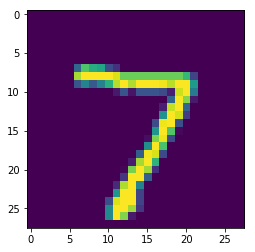

La red neuronal determina que la imagen es un:  7


In [0]:
#Imagen a clasificar
img_prueba = X_test[0] 
clas = Y_test[0]

#Para poder mostrarla con imshow() necesitamos un array bidimensional y actualmente su formato es (28,28,1) 
prueba = prueba.reshape(28, 28)
plt.imshow(prueba)
plt.show()

#Vemos que vamos a clasificar un 7. Veamos que nos devuelve la red neuronal
prueba = prueba.reshape(1, 28, 28, 1)
clasificacion = list(modelo.predict(prueba)[0])
resultado = clasificacion.index(max(clasificacion))
print("La red neuronal determina que la imagen es un: ", resultado)

 

###Guardar y cargar un modelo
Para guardar el modelo haremos uso del método save() y para cargarlo el método load_model(). El tipo de fichero que usa Keras es del formato .h5

In [0]:
#Guardamos el modelo
modelo.save('VGG13_MNIST_model.h5')

#Si quisieramos cargarlo
#model = load_model('my_model.h5')